## Import Libraries

In [1]:
from quspin.operators import hamiltonian
from quspin.basis import spin_basis_1d
from quspin.basis import spinless_fermion_basis_1d
import numpy as np
import matplotlib.pyplot as plt
import itertools
plt.rcParams['figure.figsize'] = [10, 8]

## Define Constants/Helpers

In [2]:
N = 9
N_filled = 3#N // 2
P_neg1 = 1
t = -1
g = -1
m = -1
PBC = True

In [3]:
def stringbox(lst, caption):
    return caption + "-" * (100 - len(caption))+"\n" + str(lst) + "\n" + "-" * 100

## Spin Basis Simulation

Static couplings:-----------------------------------------------------------------------------------
[['+-', [[1, 0, 1], [1, 1, 2], [1, 2, 3], [1, 3, 4], [1, 4, 5], [1, 5, 6], [1, 6, 7], [1, 7, 8], [1, 8, 0]]], ['+-', [[1, 1, 0], [1, 2, 1], [1, 3, 2], [1, 4, 3], [1, 5, 4], [1, 6, 5], [1, 7, 6], [1, 8, 7], [1, 0, 8]]], ['+-', [[-1, 0, 0], [1, 1, 1], [-1, 2, 2], [1, 3, 3], [-1, 4, 4], [1, 5, 5], [-1, 6, 6], [1, 7, 7], [-1, 8, 8]]], ['z', [[-1, 0]]], ['zz', [[-1, 0, 1]]], ['zzz', [[1, 0, 1, 2]]], ['zzzz', [[1, 0, 1, 2, 3]]], ['zzzzz', [[-1, 0, 1, 2, 3, 4]]], ['zzzzzz', [[-1, 0, 1, 2, 3, 4, 5]]], ['zzzzzzz', [[1, 0, 1, 2, 3, 4, 5, 6]]], ['zzzzzzzz', [[1, 0, 1, 2, 3, 4, 5, 6, 7]]], ['zzzzzzzzz', [[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8]]]]
----------------------------------------------------------------------------------------------------
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!


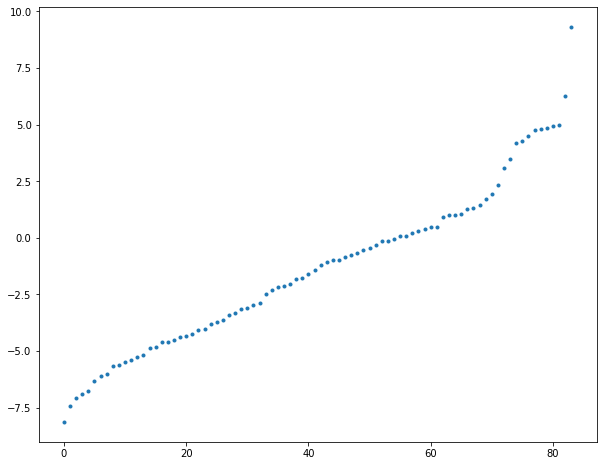

In [4]:
spin_basis = spin_basis_1d(N, pauli=-1, Nup=N_filled)
static_terms = []
dynamic_terms = []

### Hopping term
L = (N if PBC else N-1)
hop_coupling = [[-t, i, (i+1) % N] for i in range(L)]
hop_coupling_dag = [[-t, (i+1) % N, i] for i in range(L)]
if PBC and N_filled % 2 == 0:
    hop_coupling[-1][0] = -hop_coupling[-1][0]
    hop_coupling_dag[-1][0] = -hop_coupling_dag[-1][0]
static_terms += [["+-", hop_coupling]]
static_terms += [["+-", hop_coupling_dag]]

### Mass term
mass_coupling = [[m * (-1) ** i, i, i] for i in range(N)]
static_terms += [["+-", mass_coupling]]

### E-field term
E_link_parity = lambda x : -1 if (x % 4) < 2 else 1
for i in range(N):
    E_coupling = [P_neg1 * -g * E_link_parity(i)] + list(range(i+1))
    static_terms += [["z" * (i+1), [E_coupling]]]

print(stringbox(static_terms, "Static couplings:"))
### Plotting spectrum
H = hamiltonian(static_terms, dynamic_terms, basis=spin_basis, dtype=np.float64)
spin_eigvals = H.eigvalsh()
plt.plot(spin_eigvals, ".")
plt.show()

## Fermion Basis

Static couplings:-----------------------------------------------------------------------------------
[['+-', [[1, 0, 1], [1, 1, 2], [1, 2, 3], [1, 3, 4], [1, 4, 5], [1, 5, 6], [1, 6, 7], [1, 7, 8], [1, 8, 0]]], ['+-', [[1, 1, 0], [1, 2, 1], [1, 3, 2], [1, 4, 3], [1, 5, 4], [1, 6, 5], [1, 7, 6], [1, 8, 7], [1, 0, 8]]], ['+-', [[-1, 0, 0], [1, 1, 1], [-1, 2, 2], [1, 3, 3], [-1, 4, 4], [1, 5, 5], [-1, 6, 6], [1, 7, 7], [-1, 8, 8]]], ['z', [[-2, 0]]], ['zz', [[-4, 0, 1]]], ['zzz', [[8, 0, 1, 2]]], ['zzzz', [[16, 0, 1, 2, 3]]], ['zzzzz', [[-32, 0, 1, 2, 3, 4]]], ['zzzzzz', [[-64, 0, 1, 2, 3, 4, 5]]], ['zzzzzzz', [[128, 0, 1, 2, 3, 4, 5, 6]]], ['zzzzzzzz', [[256, 0, 1, 2, 3, 4, 5, 6, 7]]], ['zzzzzzzzz', [[-512, 0, 1, 2, 3, 4, 5, 6, 7, 8]]]]
----------------------------------------------------------------------------------------------------
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!


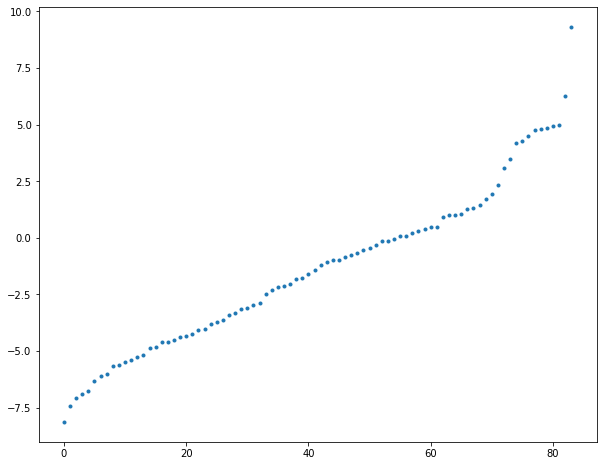

In [5]:
fermion_basis = spinless_fermion_basis_1d(L=N, Nf=N_filled)
static_terms = []
dynamic_terms = []

### Hopping term
L = (N if PBC else N-1)
hop_coupling = [[-t, i, (i+1) % N] for i in range(L)]
hop_coupling_dag = [[-t, (i+1) % N, i] for i in range(L)]
static_terms += [["+-", hop_coupling]]
static_terms += [["+-", hop_coupling_dag]]

### Mass term
mass_coupling = [[m * (-1) ** i, i, i] for i in range(N)]
static_terms += [["+-", mass_coupling]]

### E-field term
E_link_parity = lambda x : -1 if (x % 4) < 2 else 1
for i in range(N):
    E_coupling = [P_neg1 * -g * E_link_parity(i) * 2 ** (i+1)] + list(range(i+1))
    static_terms += [["z" * (i+1), [E_coupling]]]

print(stringbox(static_terms, "Static couplings:"))
### Plotting spectrum
H = hamiltonian(static_terms, dynamic_terms, basis=fermion_basis, dtype=np.float64)
fermion_eigvals = H.eigvalsh()
plt.plot(fermion_eigvals, ".")
plt.show()

## Comparison

In [6]:
mdiff = max(fermion_eigvals - spin_eigvals)
print(stringbox(fermion_eigvals, "Fermion eigenvalues:"))
print(stringbox(spin_eigvals, "Spin eigenvalues:"))
print("Maximum difference between eigenvalues:", mdiff)

Fermion eigenvalues:--------------------------------------------------------------------------------
[-8.13674866 -7.43942223 -7.08800471 -6.87770005 -6.75535017 -6.31203046
 -6.08551068 -6.01584561 -5.64960736 -5.61498853 -5.48909857 -5.40729008
 -5.25715016 -5.16035121 -4.88250337 -4.82438333 -4.61698459 -4.5953694
 -4.49468464 -4.39322219 -4.31925267 -4.26242002 -4.0789757  -4.02075648
 -3.81163404 -3.73191997 -3.62788051 -3.39916052 -3.29905451 -3.15294822
 -3.08280573 -2.97816905 -2.85882668 -2.47860444 -2.3161629  -2.16407328
 -2.11378048 -2.02848753 -1.83651061 -1.75677912 -1.60033585 -1.40971516
 -1.18156035 -1.05057628 -0.99421683 -0.97146551 -0.85416758 -0.76460772
 -0.6702977  -0.52758439 -0.44078771 -0.31541907 -0.16088856 -0.13778955
 -0.03321024  0.08138836  0.09395727  0.23303772  0.30245919  0.37071919
  0.46497726  0.47377866  0.92270137  0.98779683  1.0035986   1.05692837
  1.25867213  1.31577247  1.46693525  1.71106199  1.92690234  2.33798901
  3.0960626   3.4655561 